<a href="https://colab.research.google.com/github/varqse/BBN_Data_Analytics/blob/main/BBN_Big_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
folder_path = '/content/drive/My Drive/CSVfiles'
os.makedirs(folder_path, exist_ok=True)

In [ ]:
os.listdir('/content/drive/My Drive/CSVfiles')

['train.csv', 'Big Data.xlsx']

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/CSVfiles/Big Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Lembar1')

df.head()

,Tanggal,Jam,Nama Kasir,Jenis Produk,Nama Produk,Harga Per Produk,Jumlah,SubTotal,Tipe Harga,Total
0,2024-09-02,18:00:20,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000
1,2024-09-02,18:00:20,Dian paramita,Minuman,Choco ice,10000,2,20000,Normal,20000
2,2024-09-02,18:00:20,Dian paramita,Minuman,Strawberry ice,10000,1,10000,Normal,10000
3,2024-09-02,18:00:20,Dian paramita,Snack,Kentang Goreng,12000,2,24000,Normal,24000
4,2024-09-02,18:39:22,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000


In [45]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df['Tanggal'] = df['Tanggal'].dt.strftime('%m/%d/%Y')

print(df['Tanggal'].head())

0    09/02/2024
1    09/02/2024
2    09/02/2024
3    09/02/2024
4    09/02/2024
Name: Tanggal, dtype: object


In [46]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True, errors='coerce')

print(df['Tanggal'].head())

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.time

0   2024-02-09
1   2024-02-09
2   2024-02-09
3   2024-02-09
4   2024-02-09
Name: Tanggal, dtype: datetime64[ns]


In [9]:
df.head()

,Tanggal,Jam,Nama Kasir,Jenis Produk,Nama Produk,Harga Per Produk,Jumlah,SubTotal,Tipe Harga,Total
0,2024-02-09,18:00:20,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000
1,2024-02-09,18:00:20,Dian paramita,Minuman,Choco ice,10000,2,20000,Normal,20000
2,2024-02-09,18:00:20,Dian paramita,Minuman,Strawberry ice,10000,1,10000,Normal,10000
3,2024-02-09,18:00:20,Dian paramita,Snack,Kentang Goreng,12000,2,24000,Normal,24000
4,2024-02-09,18:39:22,Dian paramita,Bakso,Nyonya,13000,1,13000,Normal,13000


In [8]:
top_products = df.groupby('Nama Produk')['Jumlah'].sum().sort_values(ascending=False).head(10)

top_products_df = pd.DataFrame(top_products).reset_index()
top_products_df.columns = ['Nama Produk', 'Jumlah Terjual']

display(top_products_df)

,Nama Produk,Jumlah Terjual
0,Es Teh,131
1,Pentol,111
2,Kentang Goreng,78
3,Nyonya,49
4,Reguler,40
5,Teh,37
6,Kopi Hitam,36
7,Cappuccino ice,27
8,Money bag goreng,26
9,Mie Goreng,24


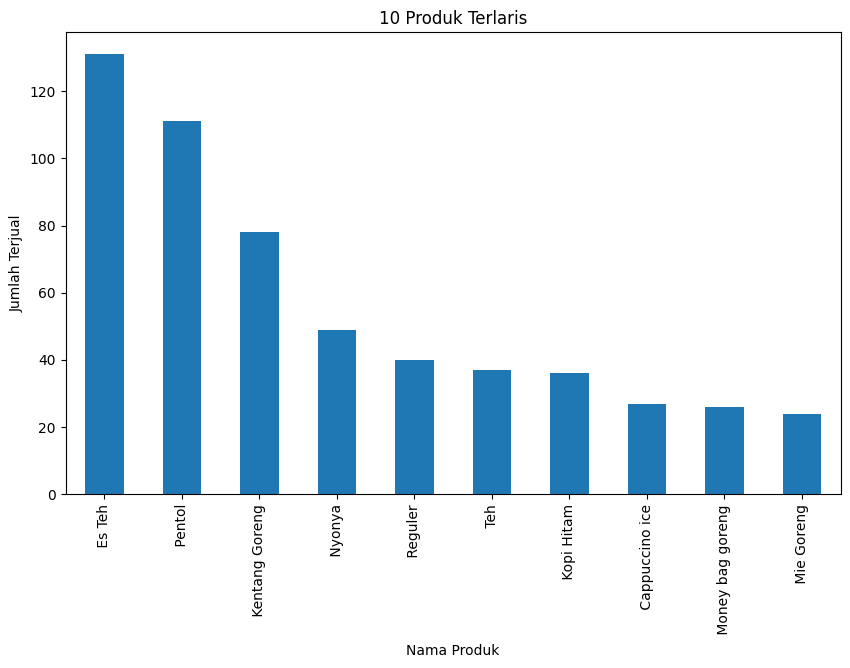

In [10]:
top_products.head(10).plot(kind='bar', figsize=(10, 6), title='10 Produk Terlaris')
plt.ylabel('Jumlah Terjual')
plt.show()

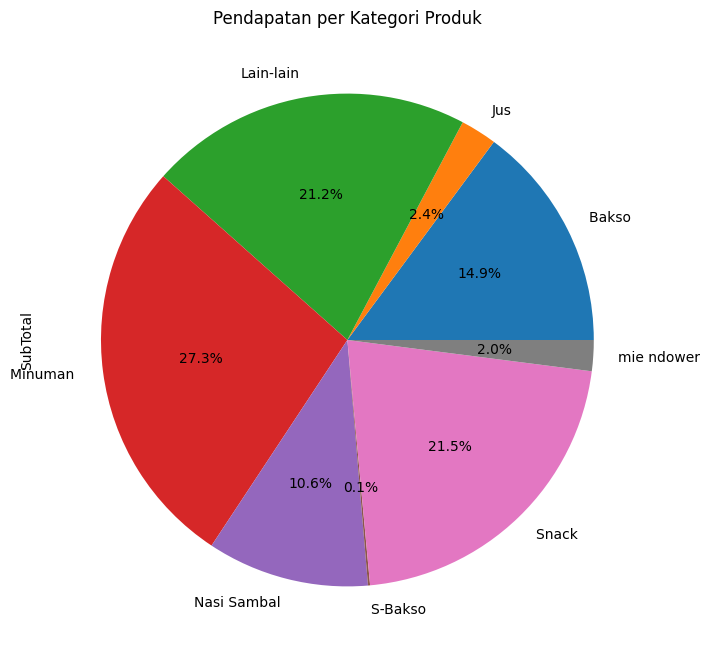

In [11]:
category_sales = df.groupby('Jenis Produk')['SubTotal'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Pendapatan per Kategori Produk')
plt.show()

<ipython-input-47-73819e0d94b8>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Jam_Rentang'] = df['Jam'].dt.floor('H') + pd.Timedelta(minutes=1)


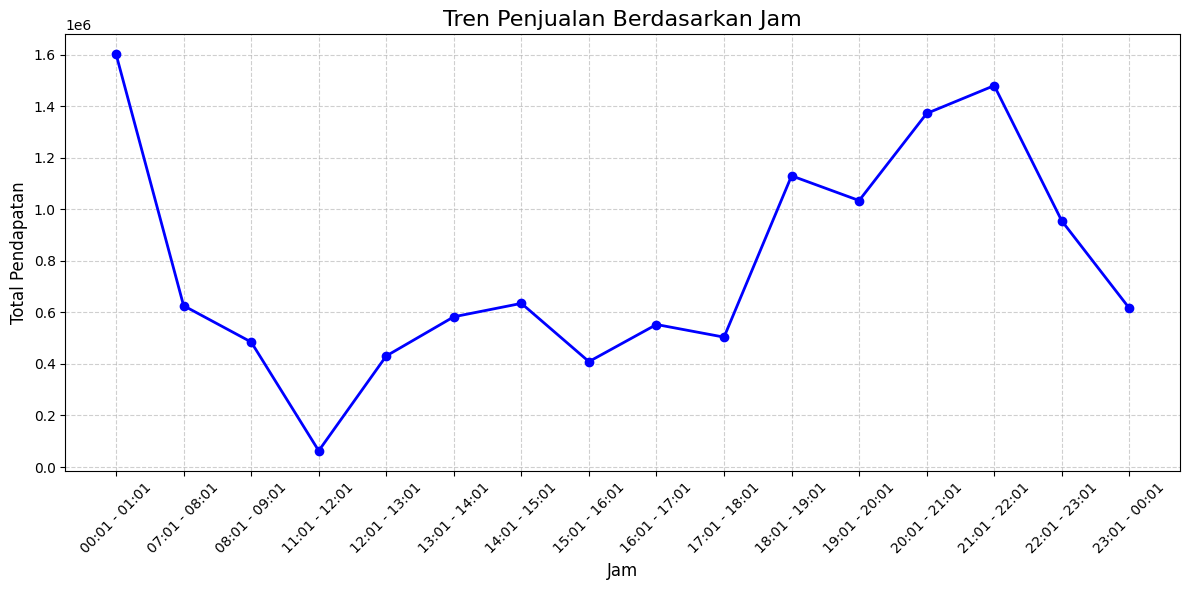

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S')

df['Jam_Rentang'] = df['Jam'].dt.floor('H') + pd.Timedelta(minutes=1)

hourly_sales = df.groupby(['Jam_Rentang'])['Total'].sum().reset_index()

hourly_sales['Jam_Label'] = hourly_sales['Jam_Rentang'].dt.strftime('%H:%M') + ' - ' + (hourly_sales['Jam_Rentang'] + pd.Timedelta(hours=1)).dt.strftime('%H:%M')

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales['Jam_Label'], hourly_sales['Total'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Tren Penjualan Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


MSE (Regresi Linear dengan Jam): 305673506.2950991


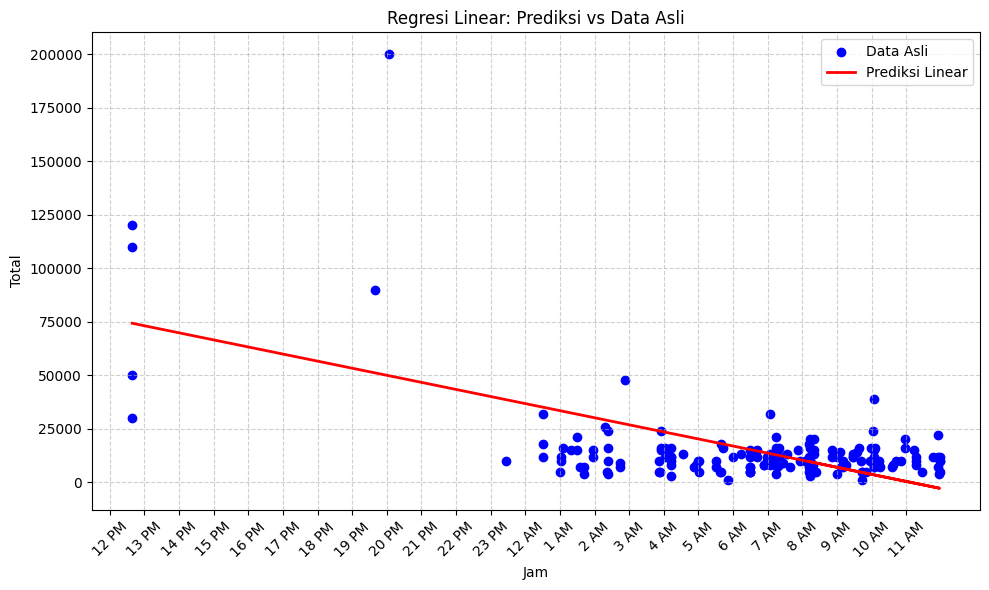

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.minute / 60

X = df[['Jam']]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
print(f'MSE (Regresi Linear dengan Jam): {mse_linear}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi Linear')
plt.title('Regresi Linear: Prediksi vs Data Asli')
plt.xlabel('Jam')
plt.ylabel('Total')
plt.legend()

ticks = np.arange(0, 24, 1)
tick_labels = [(12 + t) % 24 for t in ticks]
tick_labels_formatted = [f"{hour if hour != 0 else 12} {'PM' if 12 <= hour < 24 else 'AM'}" for hour in tick_labels]
plt.xticks(ticks=ticks, labels=tick_labels_formatted, rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


MSE (Regresi Polinomial dengan Jam): 298698972.0957837


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


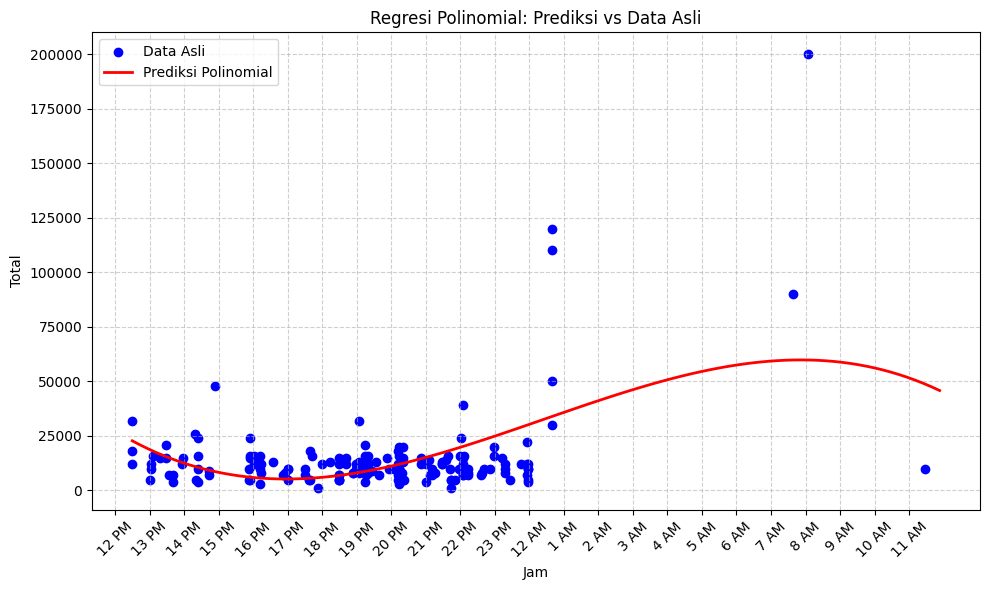

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.minute / 60
df['Jam'] = (df['Jam'] - 12) % 24

X = df[['Jam']]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

y_pred_poly = model_poly.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE (Regresi Polinomial dengan Jam): {mse_poly}')

plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Data Asli')

X_range = np.linspace(X['Jam'].min(), X['Jam'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model_poly.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Prediksi Polinomial')

ticks = np.arange(0, 24, 1)
tick_labels = [(hour + 12) % 24 for hour in ticks]
tick_labels_formatted = [f"{hour if hour != 0 else 12} {'PM' if 12 <= hour < 24 else 'AM'}" for hour in tick_labels]
plt.xticks(ticks=ticks, labels=tick_labels_formatted, rotation=45)

plt.title('Regresi Polinomial: Prediksi vs Data Asli')
plt.xlabel('Jam')
plt.ylabel('Total')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Baris dengan tanggal tidak valid:
Empty DataFrame
Columns: [Tanggal, Jam, Nama Kasir , Jenis Produk, Nama Produk, Harga Per Produk, Jumlah, SubTotal, Tipe Harga, Total]
Index: []


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmu1c3b16/o500cr8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmu1c3b16/9b6gmtue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1056', 'data', 'file=/tmp/tmpmu1c3b16/o500cr8v.json', 'init=/tmp/tmpmu1c3b16/9b6gmtue.json', 'output', 'file=/tmp/tmpmu1c3b16/prophet_modela5i9q04j/prophet_model-20241211155542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:55:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

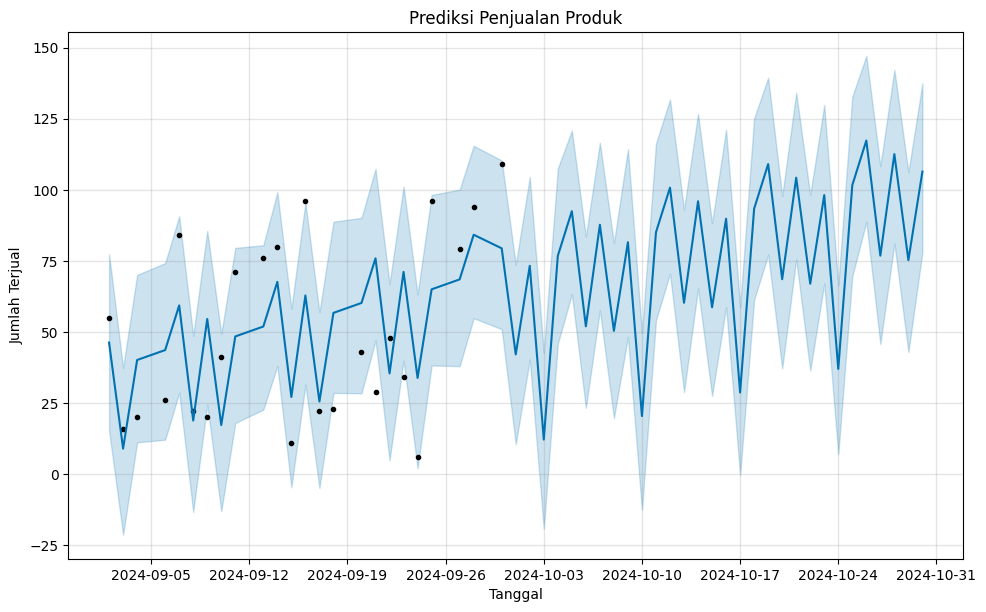

           ds        yhat  yhat_lower  yhat_upper
24 2024-10-01   42.070555   10.505432   73.601347
25 2024-10-02   73.235274   40.248862  104.444210
26 2024-10-03   12.103251  -19.184645   42.704378
27 2024-10-04   76.727020   45.869428  107.453215
28 2024-10-05   92.434973   63.306356  120.805581
29 2024-10-06   51.949148   23.273667   83.519721
30 2024-10-07   87.649492   57.666518  116.519235
31 2024-10-08   50.354446   19.631541   81.182342
32 2024-10-09   81.519165   48.261365  114.272844
33 2024-10-10   20.387142  -12.661362   49.586363
34 2024-10-11   85.010911   54.064327  116.238134
35 2024-10-12  100.718864   70.511376  131.679973
36 2024-10-13   60.233039   28.839645   92.987195
37 2024-10-14   95.933383   65.260685  126.681916
38 2024-10-15   58.638337   27.471150   88.235217
39 2024-10-16   89.803056   58.697319  121.106208
40 2024-10-17   28.671033   -0.329356   58.759539
41 2024-10-18   93.294802   61.305703  125.125854
42 2024-10-19  109.002755   77.130944  139.357489


In [48]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_excel(file_path)

df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y', errors='coerce')

invalid_dates = df[df['Tanggal'].isna()]
print("Baris dengan tanggal tidak valid:")
print(invalid_dates)

df.dropna(subset=['Tanggal'], inplace=True)

df = df.groupby('Tanggal')['Jumlah'].sum().reset_index()

df.rename(columns={'Tanggal': 'ds', 'Jumlah': 'y'}, inplace=True)

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30) #1 bulan kedepan
forecast = model.predict(future)


model.plot(forecast)
plt.title('Prediksi Penjualan Produk')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Terjual')
plt.show()

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

